<a href="https://colab.research.google.com/github/kariMMeshal/car_damge_detaction_pattern_recognition/blob/main/car_damge_detaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# STEP 1: Import Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, GlobalAveragePooling2D

# STEP 2: Download and Load Dataset
!pip install -q kaggle

# Use bash to download the dataset to ~/Downloads
!#!/bin/bash
!curl -L -o car-damage-detection.zip \
  https://www.kaggle.com/api/v1/datasets/download/anujms/car-damage-detection

# Unzip the dataset
!unzip car-damage-detection.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  122M  100  122M    0     0  23.1M      0  0:00:05  0:00:05 --:--:-- 26.8M
Archive:  car-damage-detection.zip
  inflating: data1a/training/00-damage/0001.JPEG  
  inflating: data1a/training/00-damage/0002.JPEG  
  inflating: data1a/training/00-damage/0003.JPEG  
  inflating: data1a/training/00-damage/0004.JPEG  
  inflating: data1a/training/00-damage/0005.JPEG  
  inflating: data1a/training/00-damage/0006.JPEG  
  inflating: data1a/training/00-damage/0007.JPEG  
  inflating: data1a/training/00-damage/0008.JPEG  
  inflating: data1a/training/00-damage/0009.JPEG  
  inflating: data1a/training/00-damage/0010.JPEG  
  inflating: data1a/training/00-damage/0011.JPEG  
  inflating: data1a/training/00-damage/0012.JPEG  
  inflating: data1a/training/00-damag

In [ ]:
!unzip car-damage-detection.zip

Archive:  car-damage-detection.zip
replace data1a/training/00-damage/0001.JPEG? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: data1a/training/00-damage/0001.JPEG  
  inflating: data1a/training/00-damage/0002.JPEG  
  inflating: data1a/training/00-damage/0003.JPEG  
  inflating: data1a/training/00-damage/0004.JPEG  
  inflating: data1a/training/00-damage/0005.JPEG  
  inflating: data1a/training/00-damage/0006.JPEG  
  inflating: data1a/training/00-damage/0007.JPEG  
  inflating: data1a/training/00-damage/0008.JPEG  
  inflating: data1a/training/00-damage/0009.JPEG  
  inflating: data1a/training/00-damage/0010.JPEG  
  inflating: data1a/training/00-damage/0011.JPEG  
  inflating: data1a/training/00-damage/0012.JPEG  
  inflating: data1a/training/00-damage/0013.JPEG  
  inflating: data1a/training/00-damage/0014.JPEG  
  inflating: data1a/training/00-damage/0015.JPEG  
  inflating: data1a/training/00-damage/0016.JPEG  
  inflating: data1a/training/00-damage/0017.JPEG  
  inflating: 

In [ ]:
DATASET_PATH = '/content/data1a'  # User-provided path in Colab
categories = os.listdir(DATASET_PATH)

images = []
labels = []

IMG_SIZE = 224  # For MobileNetV2 compatibility

for category in categories:
    class_path = os.path.join(DATASET_PATH, category)
    if not os.path.isdir(class_path):
        continue
    for img_name in os.listdir(class_path):
        try:
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                img = preprocess_input(img)
                images.append(img)
                labels.append(category)
        except:
            continue

images = np.array(images)
labels = np.array(labels)


In [ ]:
# تحديد المسار الجديد بعد التحقق
TRAINING_PATH = '/content/data1a/training'
VALIDATION_PATH = '/content/data1a/validation'

# دمج الصور من مجلدات التدريب والتحقق
images = []
labels = []

IMG_SIZE = 224  # For MobileNetV2 compatibility

# تحميل الصور من مجلد التدريب
for category in os.listdir(TRAINING_PATH):
    class_path = os.path.join(TRAINING_PATH, category)
    if not os.path.isdir(class_path):
        continue
    for img_name in os.listdir(class_path):
        try:
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                img = preprocess_input(img)
                images.append(img)
                labels.append(category)
        except:
            continue

# تحميل الصور من مجلد التحقق (validation)
for category in os.listdir(VALIDATION_PATH):
    class_path = os.path.join(VALIDATION_PATH, category)
    if not os.path.isdir(class_path):
        continue
    for img_name in os.listdir(class_path):
        try:
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                img = preprocess_input(img)
                images.append(img)
                labels.append(category)
        except:
            continue

images = np.array(images)
labels = np.array(labels)


In [ ]:
import os

# تحقق من هيكلية المجلد
print("Content of /content/data1a:")
print(os.listdir('/content/data1a'))




Content of /content/data1a:
['training', 'validation']


In [ ]:
if len(labels) == 0:
    raise ValueError("No image data found. Please check the dataset path and structure.")

le = LabelEncoder()
labels_encoded = le.fit_transform(labels)
labels_categorical = to_categorical(labels_encoded)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels_categorical, test_size=0.2, random_state=42)


In [ ]:
# STEP 5: Data Augmentation
aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

In [ ]:
# STEP 6: Feature Extraction with MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(IMG_SIZE, IMG_SIZE, 3)))
base_model.trainable = False  # Freeze the base model

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(np.unique(labels)), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


<ipython-input-16-5add1989e742>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(IMG_SIZE, IMG_SIZE, 3)))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
history = model.fit(aug.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    steps_per_epoch=len(X_train) // 32,
                    epochs=20)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


57/57 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.7031 - loss: 0.6154 - val_accuracy: 0.8478 - val_loss: 0.3068
Epoch 2/20
 1/57 ━━━━━━━━━━━━━━━━━━━━ 1:11 1s/step - accuracy: 0.9375 - loss: 0.3726

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


57/57 ━━━━━━━━━━━━━━━━━━━━ 22s 366ms/step - accuracy: 0.9375 - loss: 0.3726 - val_accuracy: 0.8543 - val_loss: 0.2954
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.8814 - loss: 0.2801 - val_accuracy: 0.9043 - val_loss: 0.2186
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 22s 366ms/step - accuracy: 0.8750 - loss: 0.2194 - val_accuracy: 0.9087 - val_loss: 0.2196
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - accuracy: 0.8920 - loss: 0.2506 - val_accuracy: 0.8804 - val_loss: 0.2840
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 23s 367ms/step - accuracy: 0.8438 - loss: 0.1930 - val_accuracy: 0.8717 - val_loss: 0.3010
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.8910 - loss: 0.2490 - val_accuracy: 0.8978 - val_loss: 0.2259
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 22s 366ms/step - accuracy: 0.9375 - loss: 0.1413 - val_accuracy: 0.8978 - val_loss: 0.2274
Epoch 9/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.9174 - loss: 0.2092 - val_accuracy: 0.8783 - val_

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy * 100:.2f}%")

15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8913 - loss: 0.2603
Test accuracy: 90.65%


In [ ]:
model.save("car_damage_detection_mobilenetv2.h5")

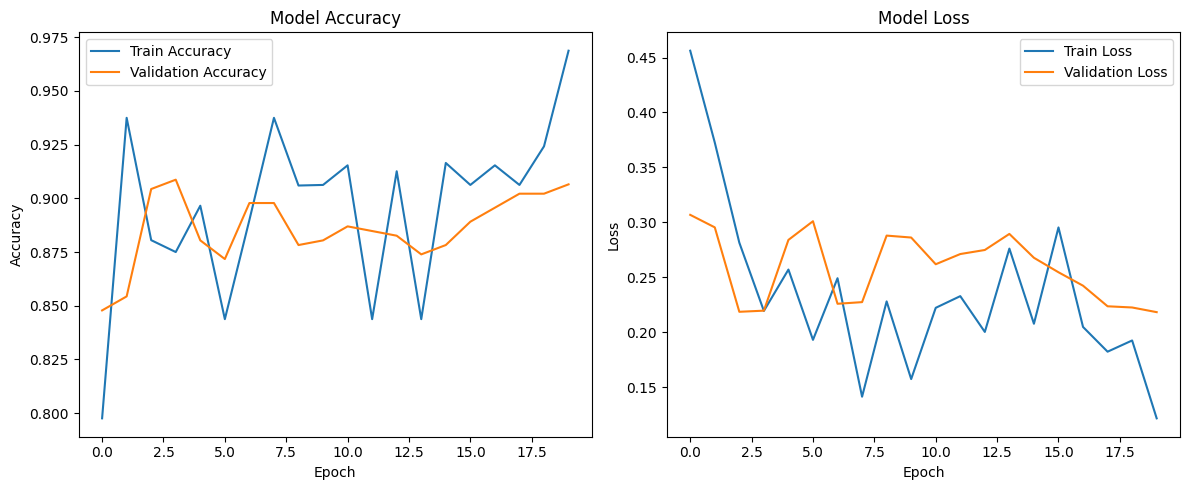

In [ ]:
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from google.colab import files
files.download("car_damage_detection_mobilenetv2.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>